<a href="https://colab.research.google.com/github/srilamaiti/ml_works/blob/main/cov_analysis_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
import numpy as np
import scipy.cluster.hierarchy as sch
import sklearn
import copy
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.stats import shapiro
from scipy.spatial.distance import cdist
from scipy import stats

In [2]:
#df = pd.read_csv('result_619_cov.csv')
df = pd.read_csv('result_326_cov.csv')
df.columns = [col.lower() for col in df.columns]
df.head()

,week_start_date,week_end_date,consumer_selling_cd,smic_group_cd,store_id,reg_unit_prc,promo_unit_prc,total_gross_amt,total_item_qty,total_mkdn_qty,...,r52w_total_mkdn_pod_alloc_amt_avg,r52w_total_gross_amt_std,r52w_total_item_qty_std,r52w_total_mkdn_qty_std,r52w_total_mkdn_amt_std,r52w_total_net_amt_std,r52w_total_mkdn_wod_alloc_amt_std,r52w_total_mkdn_pod_alloc_amt_std,cov_r52w_total_item_qty,cov_r52w_total_mkdn_qty
0,2019-12-29,2020-01-04,778229,25,326,3.49,NaN,31.41,9,0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-12-29,2020-01-04,466564,25,326,2.49,2.333333,12.45,5,3,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-12-29,2020-01-04,460913,11,326,4.99,4.690000,19.96,4,4,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-12-29,2020-01-04,460651,11,326,4.99,NaN,4.99,1,0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-29,2020-01-04,410691,25,326,0.50,NaN,18.00,36,0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.tail()

,week_start_date,week_end_date,consumer_selling_cd,smic_group_cd,store_id,reg_unit_prc,promo_unit_prc,total_gross_amt,total_item_qty,total_mkdn_qty,...,r52w_total_mkdn_pod_alloc_amt_avg,r52w_total_gross_amt_std,r52w_total_item_qty_std,r52w_total_mkdn_qty_std,r52w_total_mkdn_amt_std,r52w_total_net_amt_std,r52w_total_mkdn_wod_alloc_amt_std,r52w_total_mkdn_pod_alloc_amt_std,cov_r52w_total_item_qty,cov_r52w_total_mkdn_qty
2835,2022-12-04,2022-12-10,147065,25,326,2.99,NaN,11.96,4,0,...,-0.021835,15.925231,5.326164,3.957685,2.810269,15.502209,0.0,0.137761,0.540947,2.037943
2836,2022-12-04,2022-12-10,146761,25,326,3.49,NaN,3.49,1,0,...,0.000000,20.046384,6.246568,6.543133,4.624583,16.756636,0.0,0.000000,0.780821,1.228527
2837,2022-12-04,2022-12-10,146629,25,326,1.99,1.25,3.98,2,2,...,0.000000,17.399876,9.351583,13.453274,6.784295,12.888729,0.0,0.000000,0.661637,1.661719
2838,2022-12-04,2022-12-10,146408,25,326,3.99,NaN,7.98,2,0,...,-0.015635,16.261848,4.986369,2.559400,6.706758,12.652889,0.0,0.084874,0.698958,2.147148
2839,2022-12-04,2022-12-10,146399,25,326,2.49,NaN,4.98,2,0,...,-0.000269,11.144946,5.496297,6.529057,2.036644,9.936708,0.0,0.001941,0.625432,1.689277


In [4]:
df[df.week_end_date == '2022-12-03']

,week_start_date,week_end_date,consumer_selling_cd,smic_group_cd,store_id,reg_unit_prc,promo_unit_prc,total_gross_amt,total_item_qty,total_mkdn_qty,...,r52w_total_mkdn_pod_alloc_amt_avg,r52w_total_gross_amt_std,r52w_total_item_qty_std,r52w_total_mkdn_qty_std,r52w_total_mkdn_amt_std,r52w_total_net_amt_std,r52w_total_mkdn_wod_alloc_amt_std,r52w_total_mkdn_pod_alloc_amt_std,cov_r52w_total_item_qty,cov_r52w_total_mkdn_qty
2809,2022-11-27,2022-12-03,466564,25,326,2.69,NaN,13.45,5,0,...,0.000000,15.288780,6.205505,0.235436,0.063229,15.281589,0.0,0.000000,0.692501,4.130452
2810,2022-11-27,2022-12-03,460913,11,326,6.49,4.99,51.92,8,6,...,-0.033327,27.840085,5.042355,4.640142,6.577529,24.571773,0.0,0.139797,0.526562,1.106904
2811,2022-11-27,2022-12-03,460651,11,326,5.99,NaN,59.90,10,1,...,0.000000,18.367008,3.066877,4.358207,10.893715,13.807889,0.0,0.000000,0.442998,1.273213
2812,2022-11-27,2022-12-03,410691,25,326,0.50,NaN,33.50,67,0,...,-0.000423,10.088578,20.177157,0.648411,0.169233,10.091164,0.0,0.003051,0.384327,3.748041
2813,2022-11-27,2022-12-03,410301,25,326,2.69,NaN,10.76,4,0,...,0.000000,10.709398,4.142813,0.388368,0.097092,10.698895,0.0,0.000000,0.704081,5.110110
2814,2022-11-27,2022-12-03,322455,11,326,5.99,4.99,11.98,2,2,...,0.000000,13.098585,2.313316,3.087158,2.316004,12.472668,0.0,0.000000,0.518565,1.655312
2815,2022-11-27,2022-12-03,322390,11,326,7.49,NaN,22.47,3,0,...,0.000000,11.884654,1.833470,1.433677,4.996451,10.751816,0.0,0.000000,0.479213,3.243613
2816,2022-11-27,2022-12-03,322389,11,326,7.49,NaN,14.98,2,1,...,0.000000,18.775874,2.686413,2.398702,8.666195,16.520614,0.0,0.000000,0.422060,2.903998
2817,2022-11-27,2022-12-03,322325,11,326,7.69,4.00,75.90,10,9,...,-0.008819,17.870027,2.559989,3.551390,10.013549,14.640764,0.0,0.063596,0.446769,2.007569
2818,2022-11-27,2022-12-03,322087,11,326,5.99,3.79,65.89,11,13,...,0.000000,29.015299,4.831825,6.852766,10.649964,20.874226,0.0,0.000000,0.493648,0.804410


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2840 entries, 0 to 2839
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   week_start_date                    2840 non-null   object 
 1   week_end_date                      2840 non-null   object 
 2   consumer_selling_cd                2840 non-null   int64  
 3   smic_group_cd                      2840 non-null   int64  
 4   store_id                           2840 non-null   int64  
 5   reg_unit_prc                       2840 non-null   float64
 6   promo_unit_prc                     838 non-null    float64
 7   total_gross_amt                    2840 non-null   float64
 8   total_item_qty                     2840 non-null   int64  
 9   total_mkdn_qty                     2840 non-null   int64  
 10  total_mkdn_amt                     2840 non-null   float64
 11  total_net_amt                      2840 non-null   float

In [6]:
df.describe()

,consumer_selling_cd,smic_group_cd,store_id,reg_unit_prc,promo_unit_prc,total_gross_amt,total_item_qty,total_mkdn_qty,total_mkdn_amt,total_net_amt,...,r52w_total_mkdn_pod_alloc_amt_avg,r52w_total_gross_amt_std,r52w_total_item_qty_std,r52w_total_mkdn_qty_std,r52w_total_mkdn_amt_std,r52w_total_net_amt_std,r52w_total_mkdn_wod_alloc_amt_std,r52w_total_mkdn_pod_alloc_amt_std,cov_r52w_total_item_qty,cov_r52w_total_mkdn_qty
count,2840.000000,2840.000000,2840.0,2840.000000,838.000000,2840.000000,2840.000000,2840.000000,2840.000000,2840.000000,...,2840.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.0,2820.000000,2820.000000,2767.000000
mean,334131.424296,17.610563,326.0,4.037299,3.136895,35.621225,10.989085,3.803873,-3.946211,31.675014,...,-0.011169,20.352282,6.630320,5.851899,5.972834,16.753365,0.0,0.056303,0.564493,2.017679
std,145336.681358,6.990389,0.0,1.672642,1.155300,26.026366,12.060939,7.646278,9.543650,21.068789,...,0.017691,9.070857,5.450755,4.347147,6.123611,5.899511,0.0,0.081688,0.154498,1.046381
min,146399.000000,11.000000,326.0,0.500000,0.000000,0.500000,1.000000,0.000000,-195.000000,0.500000,...,-0.155440,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.235702
25%,322059.000000,11.000000,326.0,2.690000,2.490000,17.430000,5.000000,0.000000,-4.000000,16.470000,...,-0.015794,15.080945,3.724973,3.234896,2.607254,12.836178,0.0,0.000000,0.444802,1.230646
50%,322325.000000,11.000000,326.0,4.290000,2.990000,29.940000,8.000000,0.000000,0.000000,27.450000,...,-0.004500,18.197114,5.397111,5.122923,4.410419,15.453165,0.0,0.021942,0.549352,1.792490
75%,410691.000000,25.000000,326.0,4.990000,3.990000,47.920000,13.000000,5.000000,0.000000,42.095000,...,0.000000,23.430181,6.682052,6.859230,7.108522,19.259646,0.0,0.082917,0.659688,2.505273
max,778229.000000,25.000000,326.0,7.990000,5.580000,299.250000,149.000000,119.000000,0.000000,174.650000,...,0.000000,66.034466,43.806057,25.458062,41.095796,56.217987,0.0,0.448427,1.231734,7.298731


In [7]:
orig_df = copy.deepcopy(df)

In [8]:
orig_df['smic_group_cd'].drop_duplicates()

0    25
2    11
Name: smic_group_cd, dtype: int64

In [9]:
orig_df_20221203 = copy.deepcopy(df[df.week_end_date == '2022-12-03'])

In [10]:
new_df = df[df.week_end_date == '2022-12-03']
new_df

,week_start_date,week_end_date,consumer_selling_cd,smic_group_cd,store_id,reg_unit_prc,promo_unit_prc,total_gross_amt,total_item_qty,total_mkdn_qty,...,r52w_total_mkdn_pod_alloc_amt_avg,r52w_total_gross_amt_std,r52w_total_item_qty_std,r52w_total_mkdn_qty_std,r52w_total_mkdn_amt_std,r52w_total_net_amt_std,r52w_total_mkdn_wod_alloc_amt_std,r52w_total_mkdn_pod_alloc_amt_std,cov_r52w_total_item_qty,cov_r52w_total_mkdn_qty
2809,2022-11-27,2022-12-03,466564,25,326,2.69,NaN,13.45,5,0,...,0.000000,15.288780,6.205505,0.235436,0.063229,15.281589,0.0,0.000000,0.692501,4.130452
2810,2022-11-27,2022-12-03,460913,11,326,6.49,4.99,51.92,8,6,...,-0.033327,27.840085,5.042355,4.640142,6.577529,24.571773,0.0,0.139797,0.526562,1.106904
2811,2022-11-27,2022-12-03,460651,11,326,5.99,NaN,59.90,10,1,...,0.000000,18.367008,3.066877,4.358207,10.893715,13.807889,0.0,0.000000,0.442998,1.273213
2812,2022-11-27,2022-12-03,410691,25,326,0.50,NaN,33.50,67,0,...,-0.000423,10.088578,20.177157,0.648411,0.169233,10.091164,0.0,0.003051,0.384327,3.748041
2813,2022-11-27,2022-12-03,410301,25,326,2.69,NaN,10.76,4,0,...,0.000000,10.709398,4.142813,0.388368,0.097092,10.698895,0.0,0.000000,0.704081,5.110110
2814,2022-11-27,2022-12-03,322455,11,326,5.99,4.99,11.98,2,2,...,0.000000,13.098585,2.313316,3.087158,2.316004,12.472668,0.0,0.000000,0.518565,1.655312
2815,2022-11-27,2022-12-03,322390,11,326,7.49,NaN,22.47,3,0,...,0.000000,11.884654,1.833470,1.433677,4.996451,10.751816,0.0,0.000000,0.479213,3.243613
2816,2022-11-27,2022-12-03,322389,11,326,7.49,NaN,14.98,2,1,...,0.000000,18.775874,2.686413,2.398702,8.666195,16.520614,0.0,0.000000,0.422060,2.903998
2817,2022-11-27,2022-12-03,322325,11,326,7.69,4.00,75.90,10,9,...,-0.008819,17.870027,2.559989,3.551390,10.013549,14.640764,0.0,0.063596,0.446769,2.007569
2818,2022-11-27,2022-12-03,322087,11,326,5.99,3.79,65.89,11,13,...,0.000000,29.015299,4.831825,6.852766,10.649964,20.874226,0.0,0.000000,0.493648,0.804410


In [11]:
new_df.columns

Index(['week_start_date', 'week_end_date', 'consumer_selling_cd',
       'smic_group_cd', 'store_id', 'reg_unit_prc', 'promo_unit_prc',
       'total_gross_amt', 'total_item_qty', 'total_mkdn_qty', 'total_mkdn_amt',
       'total_net_amt', 'total_mkdn_wod_alloc_amt', 'total_mkdn_pod_alloc_amt',
       'r52w_total_gross_amt_agg', 'r52w_total_item_qty_agg',
       'r52w_total_mkdn_qty_agg', 'r52w_total_mkdn_amt_agg',
       'r52w_total_net_amt_agg', 'r52w_total_mkdn_wod_alloc_amt_agg',
       'r52w_total_mkdn_pod_alloc_amt_agg', 'r52w_total_gross_amt_avg',
       'r52w_total_item_qty_avg', 'r52w_total_mkdn_qty_avg',
       'r52w_total_mkdn_amt_avg', 'r52w_total_net_amt_avg',
       'r52w_total_mkdn_wod_alloc_amt_avg',
       'r52w_total_mkdn_pod_alloc_amt_avg', 'r52w_total_gross_amt_std',
       'r52w_total_item_qty_std', 'r52w_total_mkdn_qty_std',
       'r52w_total_mkdn_amt_std', 'r52w_total_net_amt_std',
       'r52w_total_mkdn_wod_alloc_amt_std',
       'r52w_total_mkdn_pod_alloc_amt

In [12]:
df_normality = pd.DataFrame(df[df.smic_group_cd == 11].groupby(['store_id', 'consumer_selling_cd'])['total_gross_amt'].apply(lambda row : stats.shapiro(row)[1])).reset_index()
df_normality.columns =['store_id', 'consumer_selling_cd', 'normality_p']
alpha = 0.001
df_normality['not_normal'] = df_normality['normality_p'] < alpha
df_normality

,store_id,consumer_selling_cd,normality_p,not_normal
0,326,322059,8.211445e-11,True
1,326,322060,1.851657e-02,False
2,326,322082,4.776429e-10,True
3,326,322087,1.874116e-08,True
4,326,322325,6.668497e-06,True
5,326,322389,7.635874e-02,False
6,326,322390,1.907935e-06,True
7,326,322455,2.458005e-05,True
8,326,460651,5.721268e-05,True
9,326,460913,7.493125e-04,True


In [13]:
new_df_11 = new_df[new_df.smic_group_cd == 11]
new_df_11['total_gross_amt_pct'] = (new_df_11['r52w_total_net_amt_agg'] / new_df_11['r52w_total_net_amt_agg'].sum()) * 100
new_df_11.sort_values(by = ['r52w_total_net_amt_agg'], ascending = False, inplace = True)
new_df_11['total_gross_amt_pct_cumsum'] = new_df_11['total_gross_amt_pct'].cumsum()
new_df_11

<ipython-input-13-a9d61c8977f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_11['total_gross_amt_pct'] = (new_df_11['r52w_total_net_amt_agg'] / new_df_11['r52w_total_net_amt_agg'].sum()) * 100
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
<ipython-input-13-a9d61c8977f5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

,week_start_date,week_end_date,consumer_selling_cd,smic_group_cd,store_id,reg_unit_prc,promo_unit_prc,total_gross_amt,total_item_qty,total_mkdn_qty,...,r52w_total_item_qty_std,r52w_total_mkdn_qty_std,r52w_total_mkdn_amt_std,r52w_total_net_amt_std,r52w_total_mkdn_wod_alloc_amt_std,r52w_total_mkdn_pod_alloc_amt_std,cov_r52w_total_item_qty,cov_r52w_total_mkdn_qty,total_gross_amt_pct,total_gross_amt_pct_cumsum
2810,2022-11-27,2022-12-03,460913,11,326,6.49,4.99,51.92,8,6,...,5.042355,4.640142,6.577529,24.571773,0.0,0.139797,0.526562,1.106904,14.071626,14.071626
2821,2022-11-27,2022-12-03,322059,11,326,4.99,NaN,29.94,6,1,...,7.360236,10.716049,18.873203,18.475486,0.0,0.021919,0.488825,0.799526,12.626995,26.698621
2818,2022-11-27,2022-12-03,322087,11,326,5.99,3.79,65.89,11,13,...,4.831825,6.852766,10.649964,20.874226,0.0,0.000000,0.493648,0.804410,11.784670,38.483291
2816,2022-11-27,2022-12-03,322389,11,326,7.49,NaN,14.98,2,1,...,2.686413,2.398702,8.666195,16.520614,0.0,0.000000,0.422060,2.903998,10.596317,49.079608
2819,2022-11-27,2022-12-03,322082,11,326,5.49,3.79,54.90,10,13,...,4.648545,6.115622,11.013933,18.749763,0.0,0.058632,0.538400,0.966744,10.264492,59.344100
2820,2022-11-27,2022-12-03,322060,11,326,6.49,4.99,19.47,3,1,...,3.108884,3.615577,5.192341,15.680819,0.0,0.110936,0.475510,1.403563,9.824547,69.168647
2817,2022-11-27,2022-12-03,322325,11,326,7.69,4.00,75.90,10,9,...,2.559989,3.551390,10.013549,14.640764,0.0,0.063596,0.446769,2.007569,9.290786,78.459433
2811,2022-11-27,2022-12-03,460651,11,326,5.99,NaN,59.90,10,1,...,3.066877,4.358207,10.893715,13.807889,0.0,0.000000,0.442998,1.273213,8.734794,87.194228
2814,2022-11-27,2022-12-03,322455,11,326,5.99,4.99,11.98,2,2,...,2.313316,3.087158,2.316004,12.472668,0.0,0.000000,0.518565,1.655312,6.557143,93.751370
2815,2022-11-27,2022-12-03,322390,11,326,7.49,NaN,22.47,3,0,...,1.833470,1.433677,4.996451,10.751816,0.0,0.000000,0.479213,3.243613,6.248630,100.000000


In [14]:
new_df_11['consumer_selling_cd'].drop_duplicates()

2810    460913
2821    322059
2818    322087
2816    322389
2819    322082
2820    322060
2817    322325
2811    460651
2814    322455
2815    322390
Name: consumer_selling_cd, dtype: int64

In [15]:
len(new_df_11)

10

In [16]:
# A, B, C on SKU Number
n_sku = len(new_df_11)
n_a, n_b = int(0.1*n_sku), int(0.5*n_sku)

In [17]:
new_df_11['SKU_ID'] = list(pd.Series(range(1, len(new_df_11) + 1)))
new_df_11['SKU_%'] = list(100 * pd.Series(range(1, len(new_df_11) + 1)) / len(new_df_11))
new_df_11['ABC'] = list(pd.Series(range(len(new_df_11))).apply(lambda t: 'A' if t <= n_a-1 else 'B' if t <= n_b-1 else 'C'))
new_df_11

<ipython-input-17-f734f43b031b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_11['SKU_ID'] = list(pd.Series(range(1, len(new_df_11) + 1)))
<ipython-input-17-f734f43b031b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_11['SKU_%'] = list(100 * pd.Series(range(1, len(new_df_11) + 1)) / len(new_df_11))
<ipython-input-17-f734f43b031b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

,week_start_date,week_end_date,consumer_selling_cd,smic_group_cd,store_id,reg_unit_prc,promo_unit_prc,total_gross_amt,total_item_qty,total_mkdn_qty,...,r52w_total_net_amt_std,r52w_total_mkdn_wod_alloc_amt_std,r52w_total_mkdn_pod_alloc_amt_std,cov_r52w_total_item_qty,cov_r52w_total_mkdn_qty,total_gross_amt_pct,total_gross_amt_pct_cumsum,SKU_ID,SKU_%,ABC
2810,2022-11-27,2022-12-03,460913,11,326,6.49,4.99,51.92,8,6,...,24.571773,0.0,0.139797,0.526562,1.106904,14.071626,14.071626,1,10.0,A
2821,2022-11-27,2022-12-03,322059,11,326,4.99,NaN,29.94,6,1,...,18.475486,0.0,0.021919,0.488825,0.799526,12.626995,26.698621,2,20.0,B
2818,2022-11-27,2022-12-03,322087,11,326,5.99,3.79,65.89,11,13,...,20.874226,0.0,0.000000,0.493648,0.804410,11.784670,38.483291,3,30.0,B
2816,2022-11-27,2022-12-03,322389,11,326,7.49,NaN,14.98,2,1,...,16.520614,0.0,0.000000,0.422060,2.903998,10.596317,49.079608,4,40.0,B
2819,2022-11-27,2022-12-03,322082,11,326,5.49,3.79,54.90,10,13,...,18.749763,0.0,0.058632,0.538400,0.966744,10.264492,59.344100,5,50.0,B
2820,2022-11-27,2022-12-03,322060,11,326,6.49,4.99,19.47,3,1,...,15.680819,0.0,0.110936,0.475510,1.403563,9.824547,69.168647,6,60.0,C
2817,2022-11-27,2022-12-03,322325,11,326,7.69,4.00,75.90,10,9,...,14.640764,0.0,0.063596,0.446769,2.007569,9.290786,78.459433,7,70.0,C
2811,2022-11-27,2022-12-03,460651,11,326,5.99,NaN,59.90,10,1,...,13.807889,0.0,0.000000,0.442998,1.273213,8.734794,87.194228,8,80.0,C
2814,2022-11-27,2022-12-03,322455,11,326,5.99,4.99,11.98,2,2,...,12.472668,0.0,0.000000,0.518565,1.655312,6.557143,93.751370,9,90.0,C
2815,2022-11-27,2022-12-03,322390,11,326,7.49,NaN,22.47,3,0,...,10.751816,0.0,0.000000,0.479213,3.243613,6.248630,100.000000,10,100.0,C


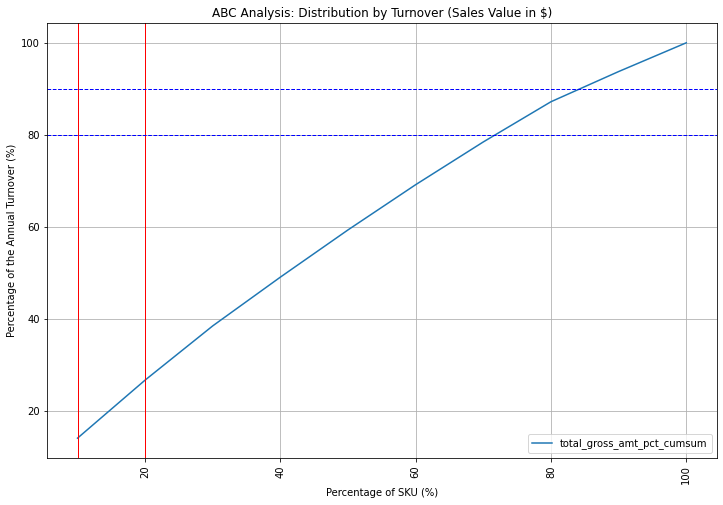

In [19]:
# Distribution by Value
ax = plt.gca()
new_df_11.plot(figsize=(12, 8), x='SKU_%', y='total_gross_amt_pct_cumsum', ax =ax, grid = True)
# ABC
# 20%, 50% of SKU Number
ax.axvline(10 , color="red", linestyle="-", linewidth = 1.0)
ax.axvline(20 , color="red", linestyle="-", linewidth = 1.0)
# 20%, 50% of SKU Number
ax.axhline(80 , color="blue", linestyle="--", linewidth = 1.0)
ax.axhline(90 , color="blue", linestyle="--", linewidth = 1.0)
plt.xlabel('Percentage of SKU (%)')
plt.xticks(rotation=90)
plt.ylabel('Percentage of the Annual Turnover (%)')
plt.title('ABC Analysis: Distribution by Turnover (Sales Value in $)')
plt.show()

In [27]:
df.set_index('week_end_date', inplace = True)

Processing 778229


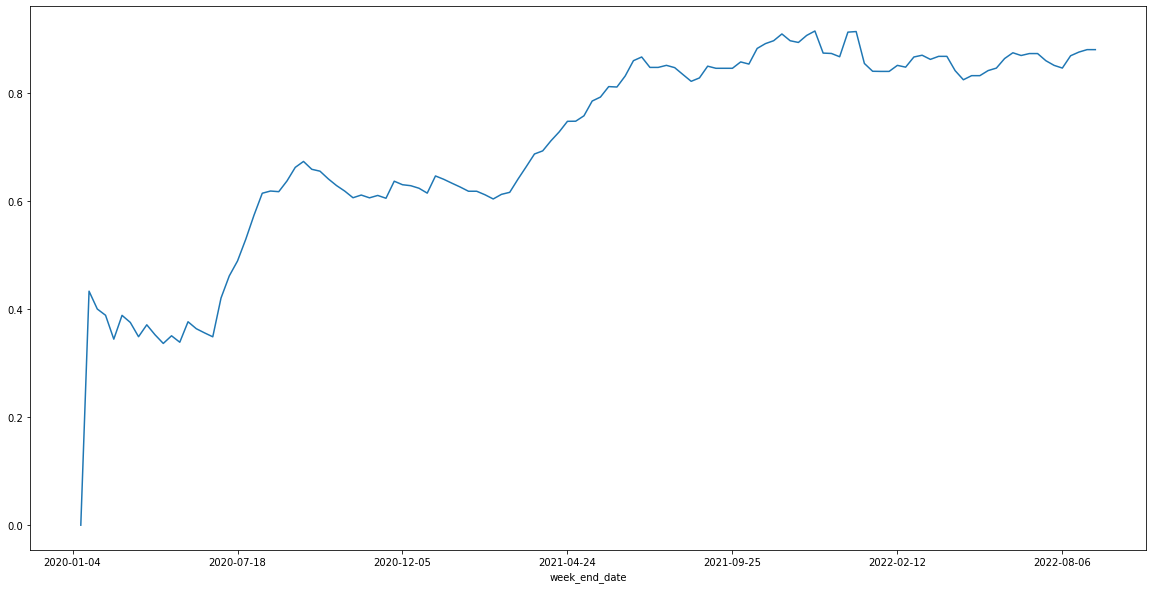

Processing 466564


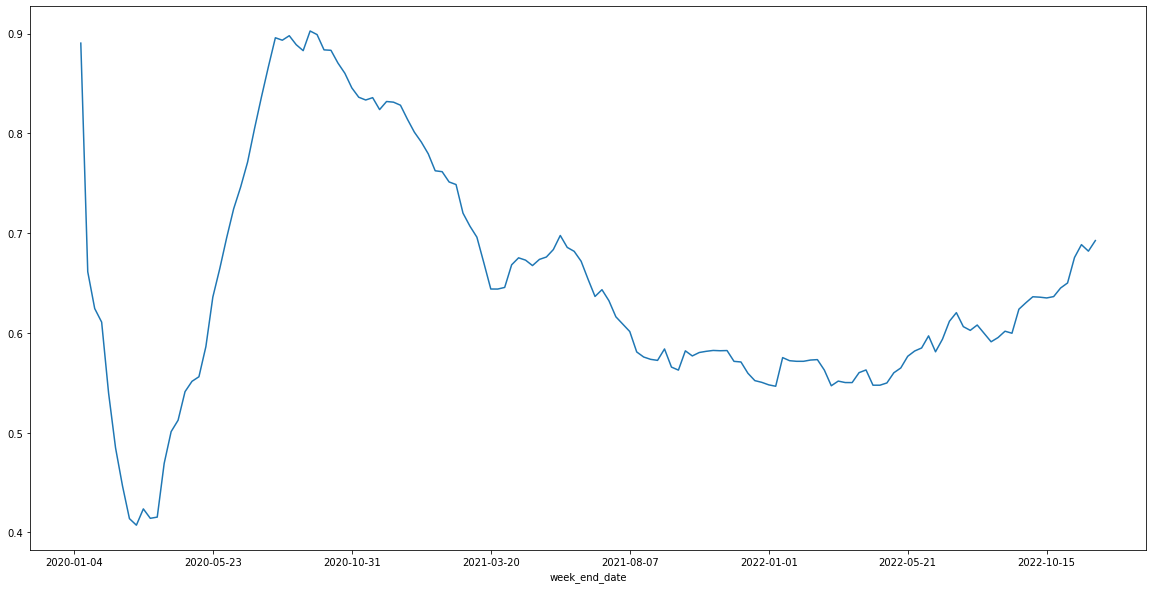

Processing 460913


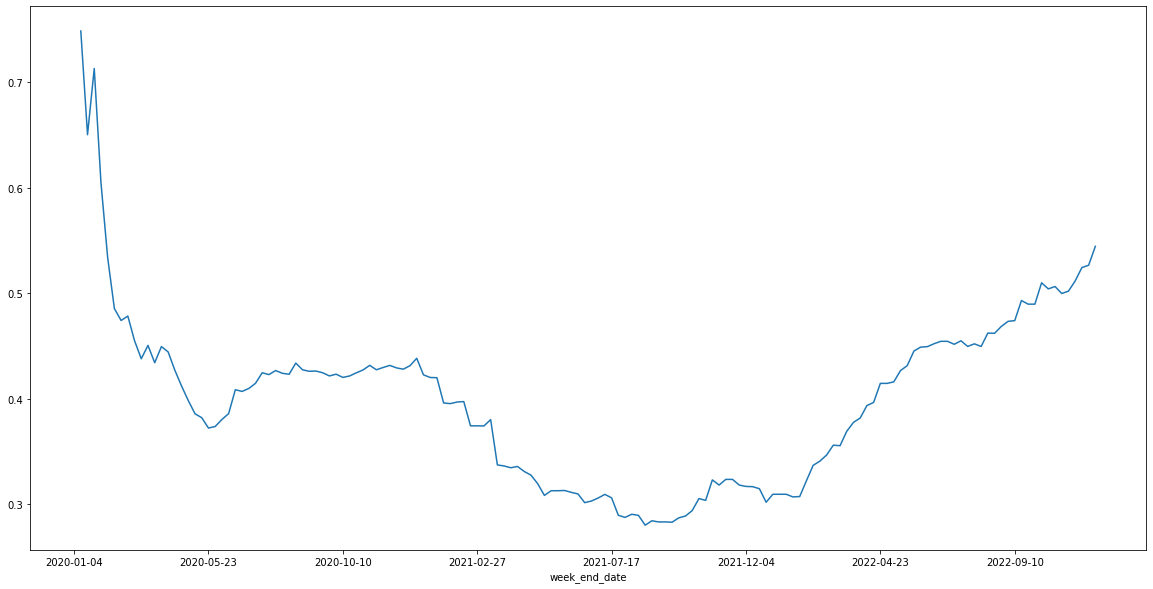

Processing 460651


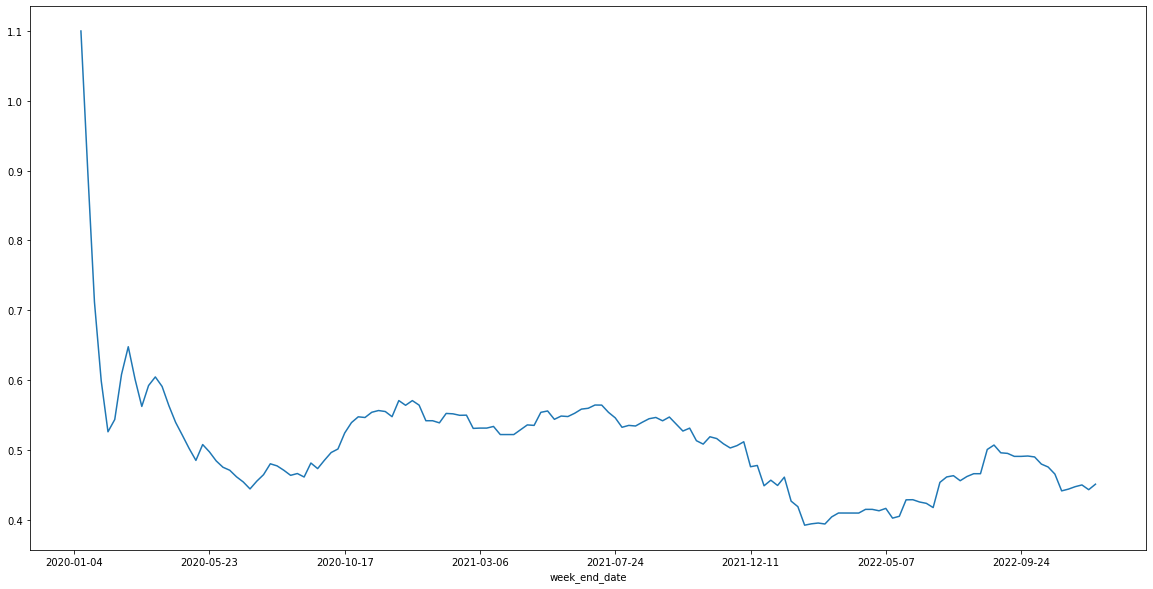

Processing 410691


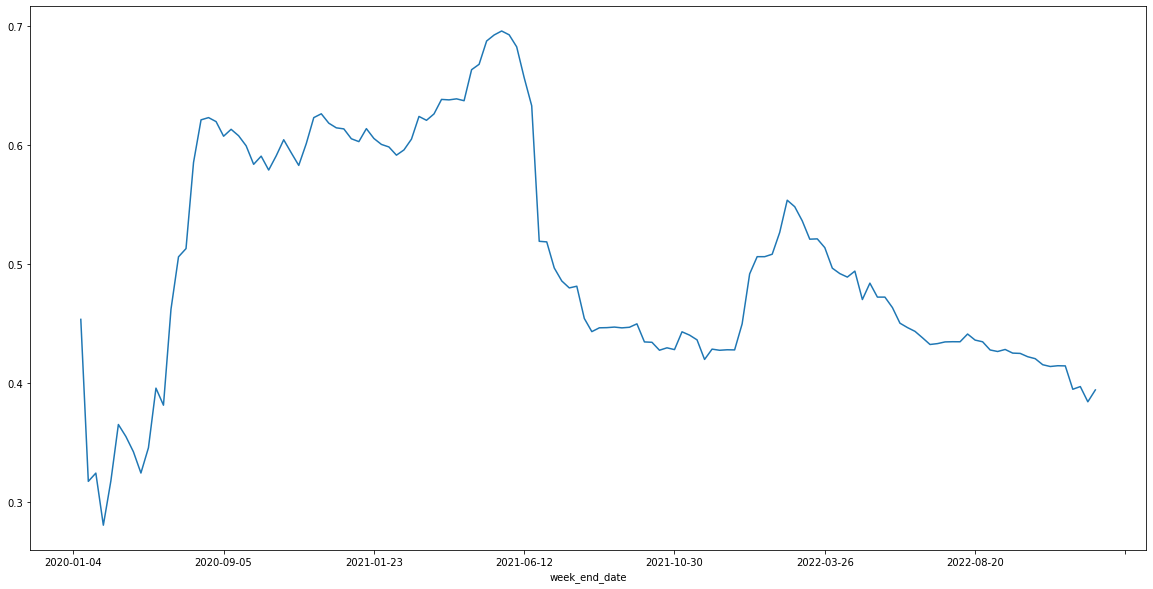

Processing 410301


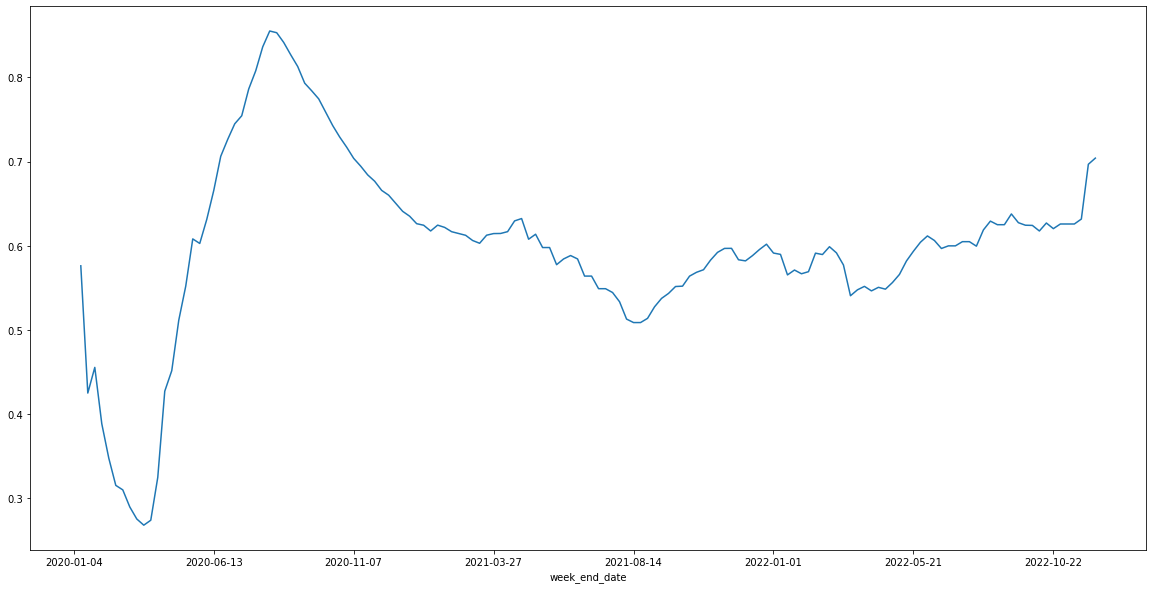

Processing 322455


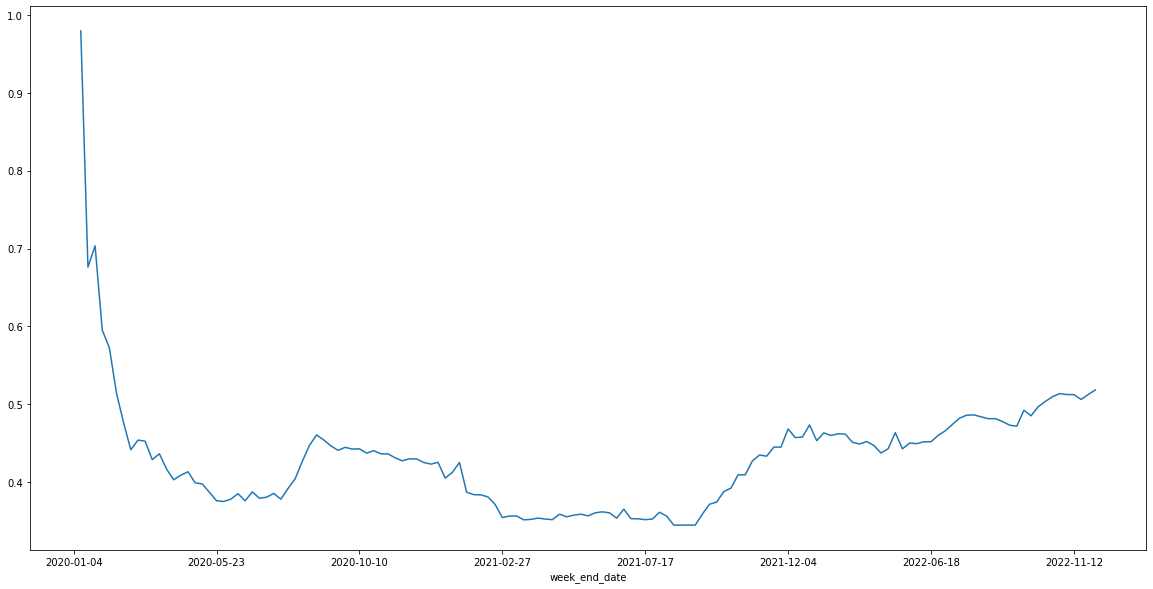

Processing 322390


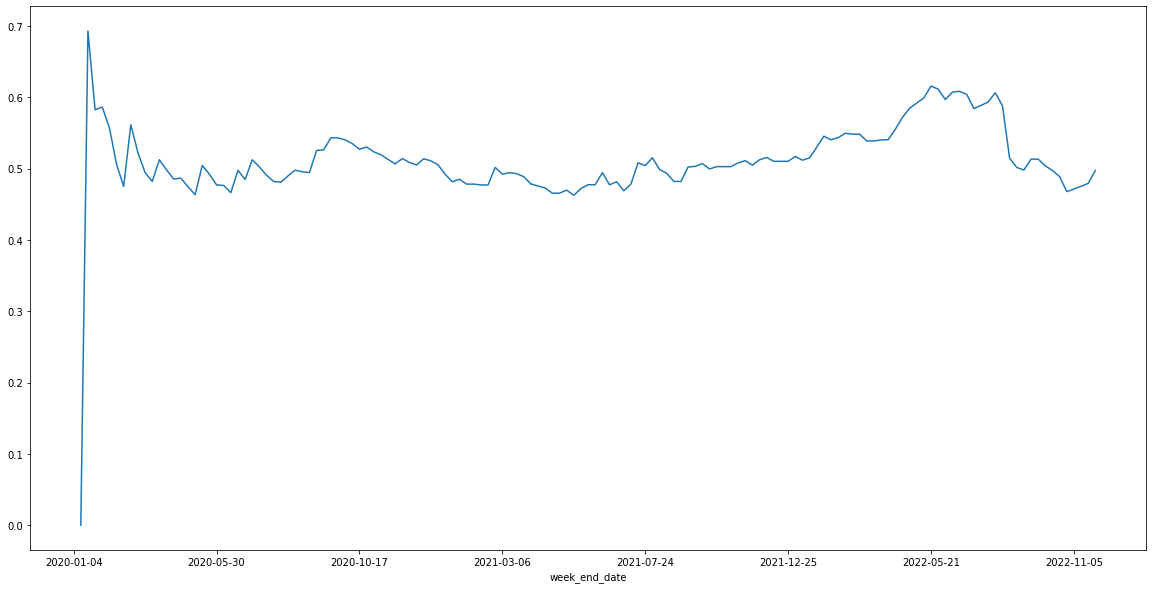

Processing 322389


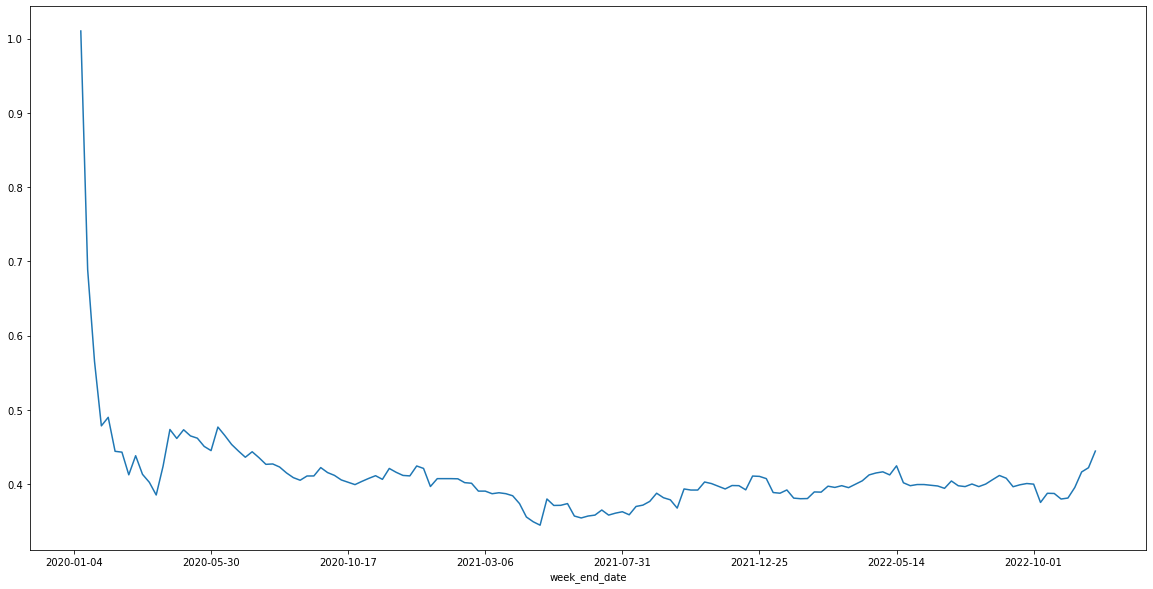

Processing 322325


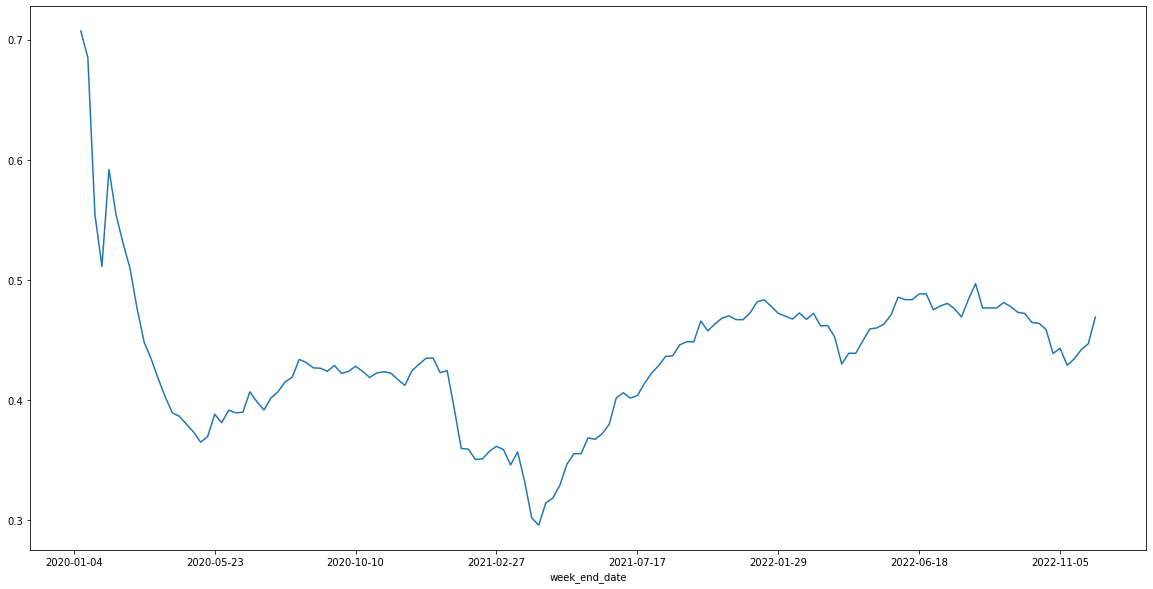

Processing 322087


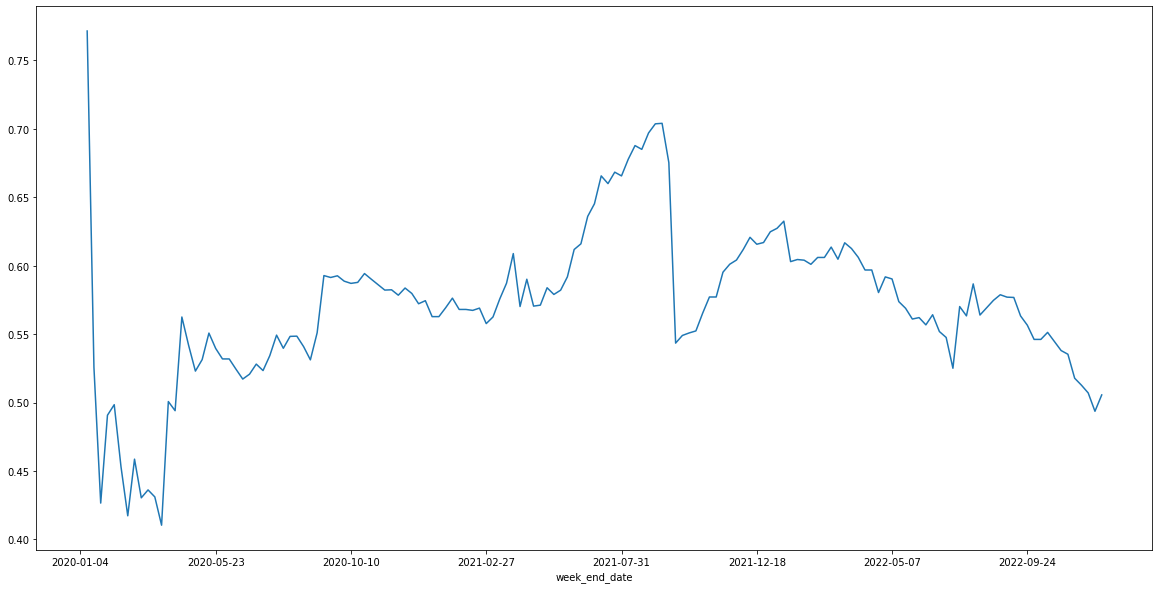

Processing 322082


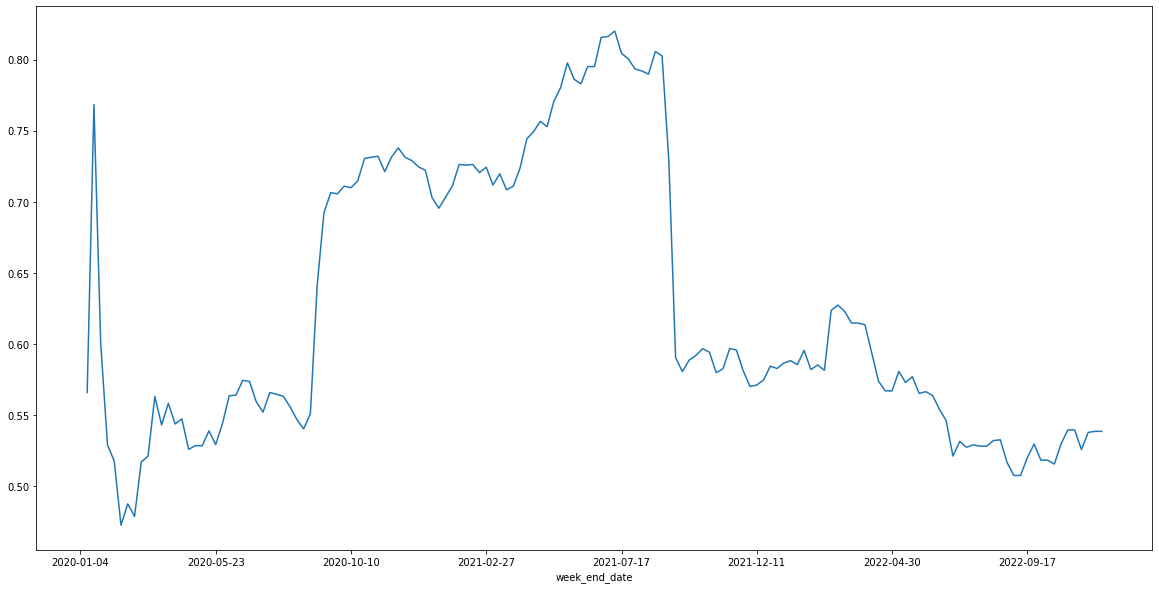

Processing 322060


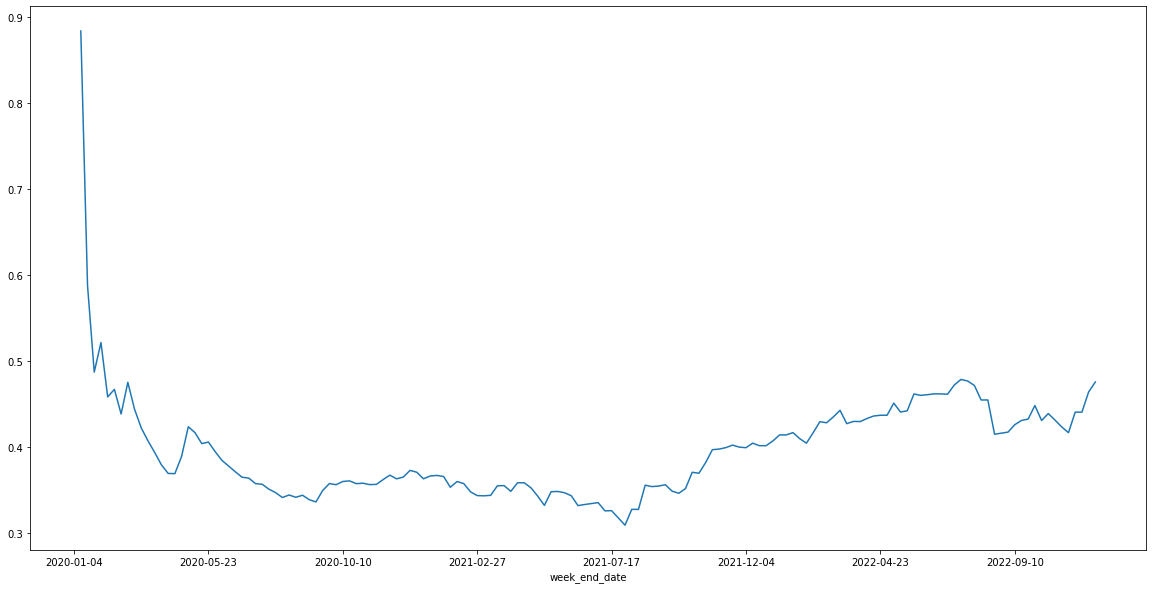

Processing 322059


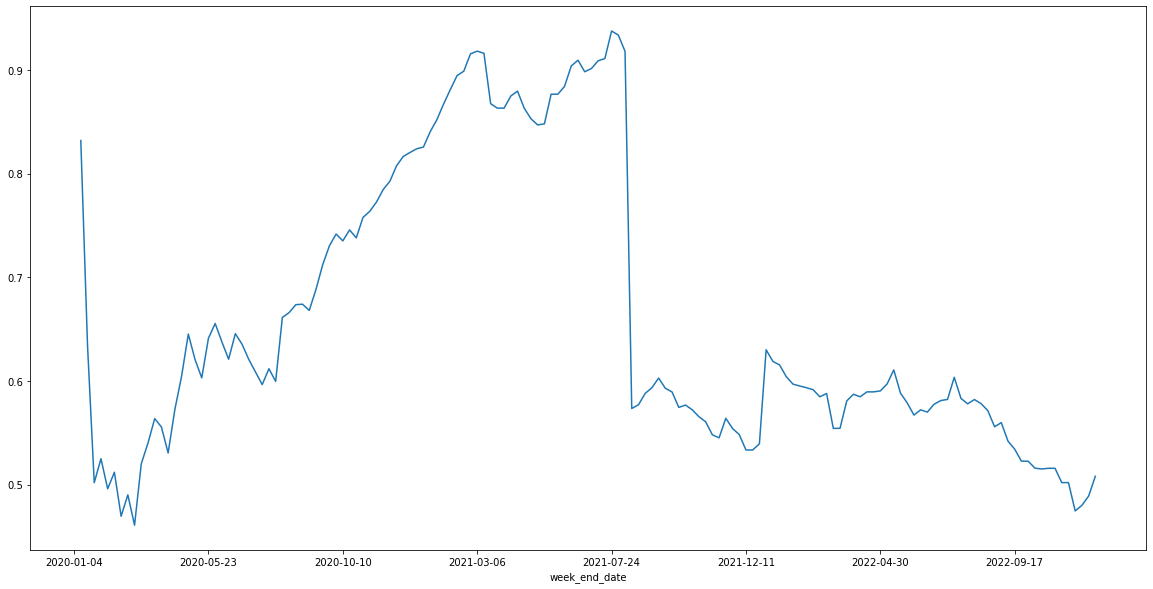

Processing 147065


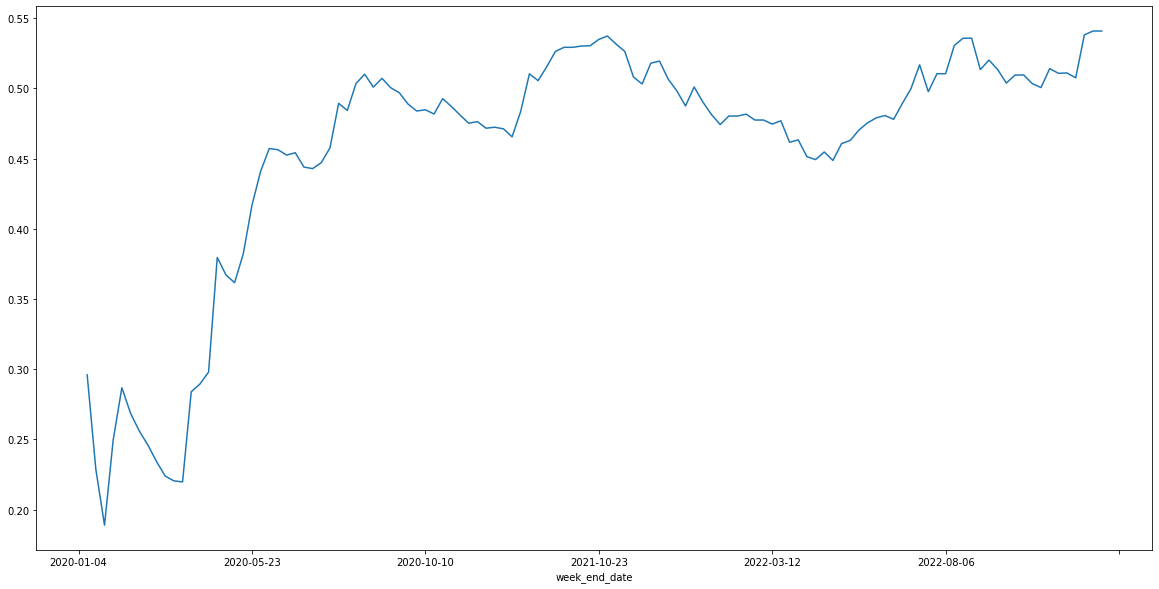

Processing 146761


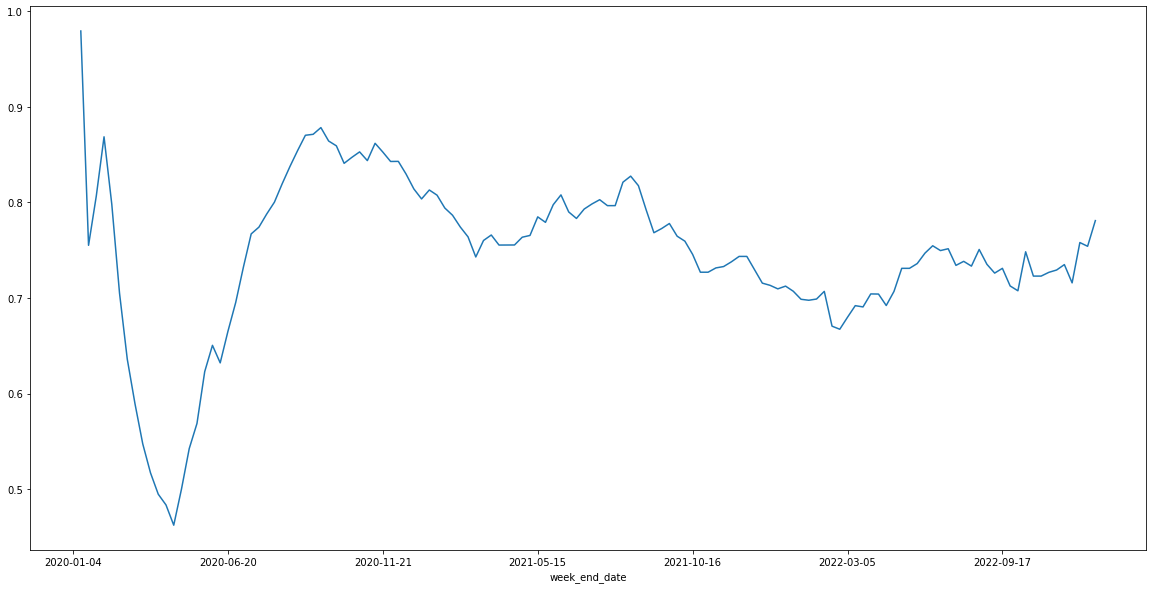

Processing 146629


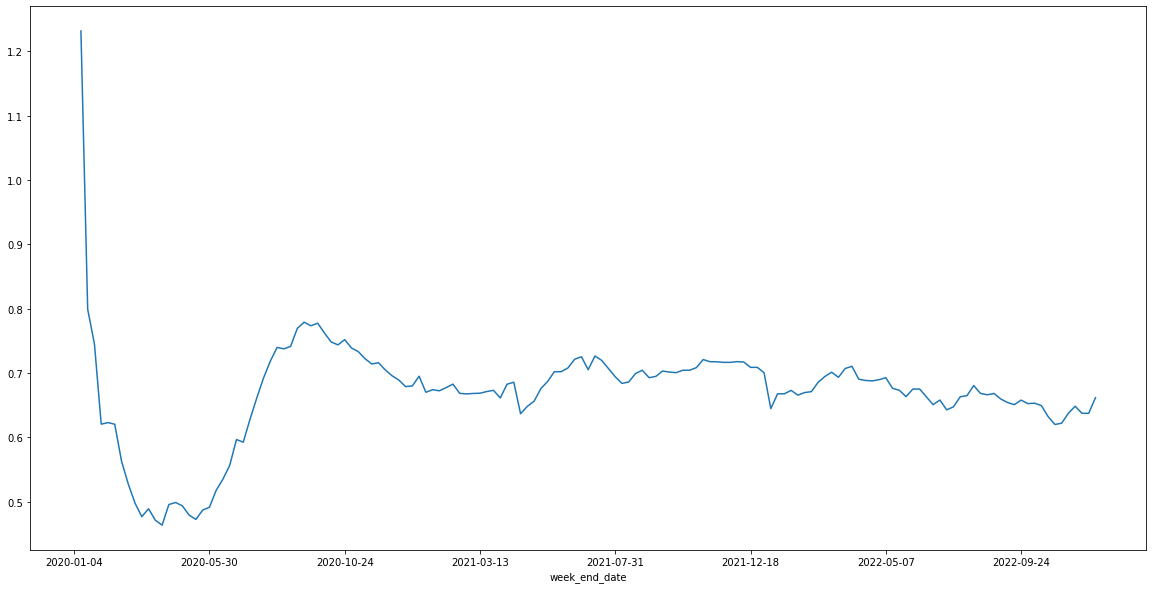

Processing 146408


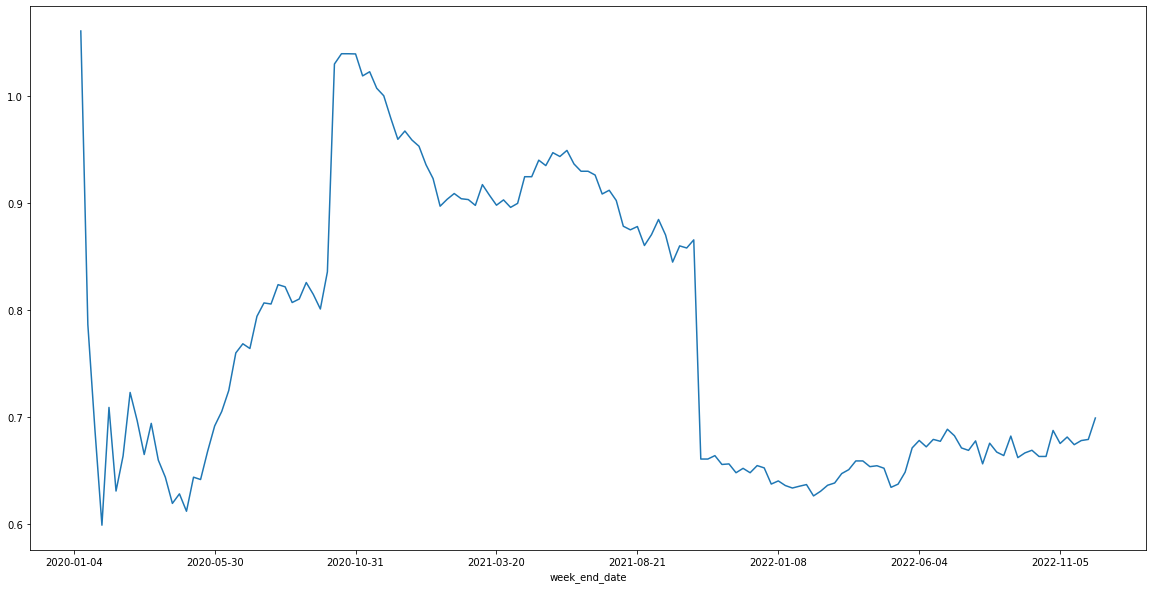

Processing 146399


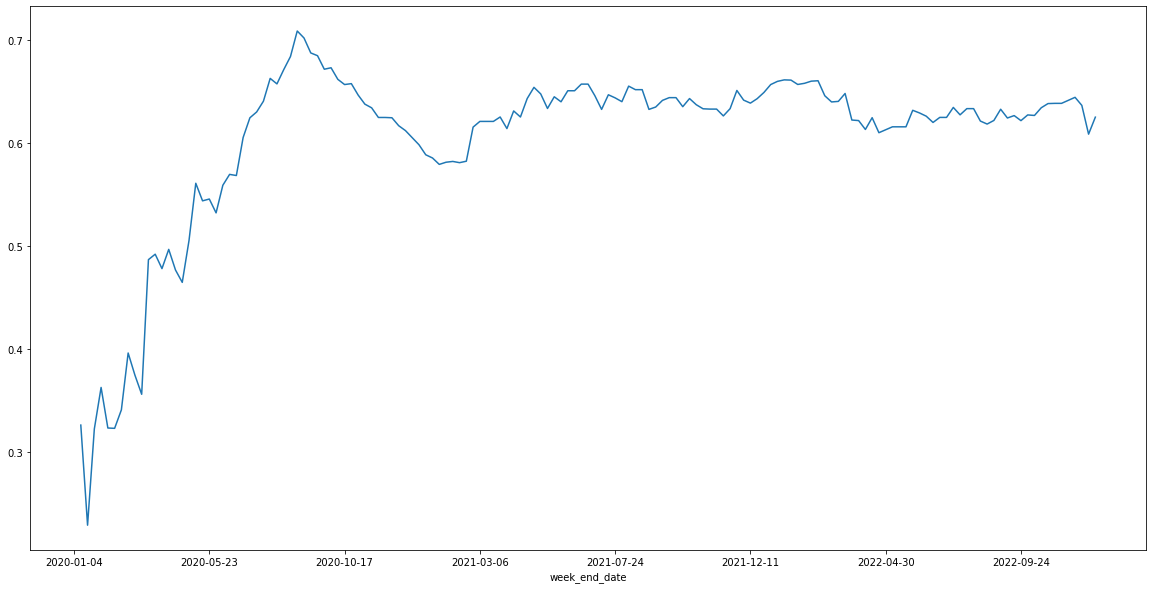

Processing 461103


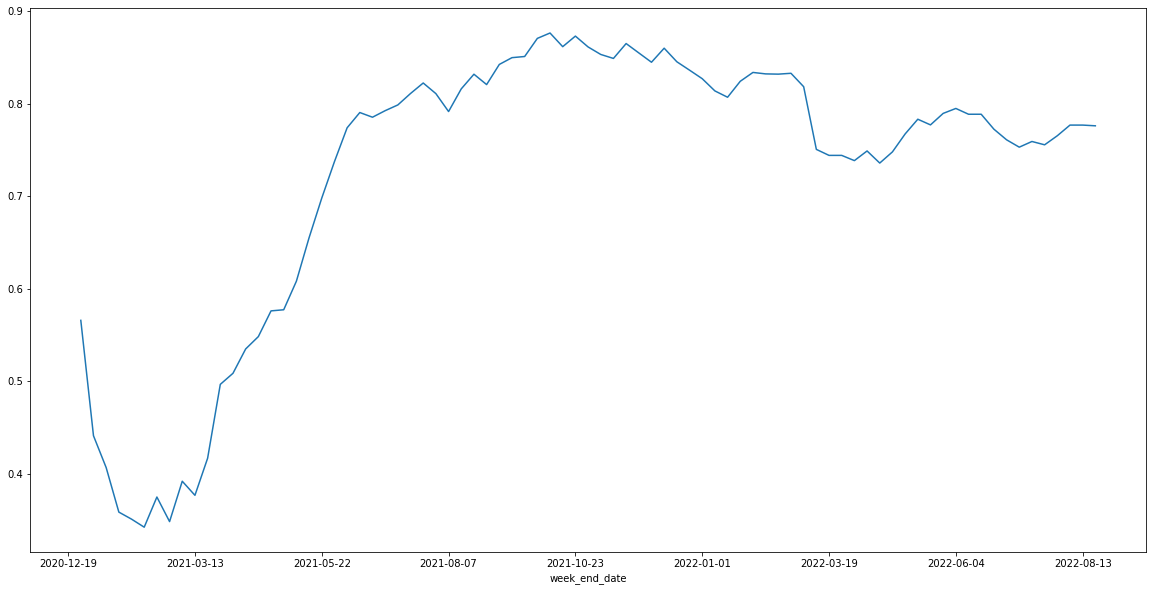

In [28]:
for item in df['consumer_selling_cd'].drop_duplicates().values.tolist():
    print(f"Processing {item}")
    df[df.consumer_selling_cd == item]['cov_r52w_total_item_qty'].plot(figsize = (20,10))
    plt.show(block = False)

In [ ]:
consumer_selling_cd_list = df['consumer_selling_cd'].values.tolist()
df = df.dropna()
df_processed = df[df.smic_group_cd == 11][['consumer_selling_cd', 'cov_r52w_total_item_qty', 'total_item_qty']]
X = np.array(df_processed.values)
X

array([[4.60913000e+05, 7.48701298e-01, 1.30000000e+01],
       [3.22455000e+05, 9.79070928e-01, 1.10000000e+01],
       [3.22325000e+05, 7.07106781e-01, 1.50000000e+01],
       ...,
       [3.22082000e+05, 5.38399973e-01, 1.00000000e+01],
       [3.22060000e+05, 4.75509899e-01, 3.00000000e+00],
       [4.60913000e+05, 5.44500597e-01, 1.00000000e+00]])

In [ ]:
df_processed.isna().sum()

consumer_selling_cd        0
cov_r52w_total_item_qty    0
total_item_qty             0
dtype: int64

In [ ]:
df_processed[df_processed.cov_r52w_total_item_qty.isna()]

,consumer_selling_cd,cov_r52w_total_item_qty,total_item_qty


In [ ]:
# Standarize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X_std)
    kmeanModel.fit(X_std)
  
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

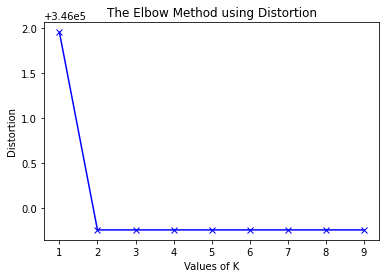

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
# Create k-mean object
clt = KMeans(n_clusters = 3, random_state=0)

# Train model
model = clt.fit(X_std)

In [ ]:
# View predict class
model.labels_

array([2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 2, 0, 0, 1, 1, 1, 0, 2, 2, 0,
       1, 1, 1, 0, 0, 2, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 1, 1, 2, 1,
       0, 2, 1, 0, 2, 1, 2, 1, 0, 1, 2, 2, 1, 1, 0, 1, 2, 1, 0, 0, 0, 0,
       2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 2, 1, 1,
       0, 2, 1, 0, 1, 1, 0, 1, 1, 1, 0, 2, 1, 1, 0, 2, 1, 0, 2, 1, 0, 2,
       1, 0, 2, 1, 1, 1, 0, 2, 1, 1, 0, 0, 0, 2, 1, 1, 0, 2, 1, 1, 0, 2,
       1, 1, 0, 2, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 2, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 1, 1, 0, 1, 0, 1,
       0, 0, 2, 1, 1, 0, 2, 1, 1, 0, 0, 0, 2, 1, 1, 1, 0, 2, 1, 0, 2, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,

In [ ]:
# View cluster centers
model.cluster_centers_

array([[-0.43742638,  1.12778786,  0.90964853],
       [-0.45481671, -0.42297807, -0.33951398],
       [ 2.19450576, -0.31453852, -0.25922766]])